In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving play_tennis.csv to play_tennis (2).csv


In [ ]:
df=pd.read_csv('play_tennis.csv')
print(df.head())

  day   outlook  temp humidity    wind play
0  D1     Sunny   Hot     High    Weak   No
1  D2     Sunny   Hot     High  Strong   No
2  D3  Overcast   Hot     High    Weak  Yes
3  D4      Rain  Mild     High    Weak  Yes
4  D5      Rain  Cool   Normal    Weak  Yes


decision trees in sklearn work with numerical data,so we encode text to number

In [ ]:
le=LabelEncoder()
df['outlook']=le.fit_transform(df['outlook'])
df['temp']=le.fit_transform(df['temp'])
df['humidity']=le.fit_transform(df['humidity'])
df['wind']=le.fit_transform(df['wind'])
df['play']=le.fit_transform(df['play'])
print(df.head())

  day  outlook  temp  humidity  wind  play
0  D1        2     1         0     1     0
1  D2        2     1         0     0     0
2  D3        0     1         0     1     1
3  D4        1     2         0     1     1
4  D5        1     0         1     1     1


In [ ]:
independent_var=df.drop(['play','day'],axis=1)
dependent_var=df['play']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent_var,dependent_var,test_size=0.3,random_state=42)

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(f"acuuracy: {accuracy*100:.2f}%")

acuuracy: 60.00%


In [ ]:
new_data=[[
    2,  #outlook(0=overcast,1=sunny,2=rain)
    1,  #temp(0=cool,1=hot,2=mild)
    0,  #humidity(0=high,1=normal)
    1,  #wind(0=strong,1=week)
]]
#predict
prediction=model.predict(new_data)
#print
print("prediction:(0=N0,1=Yes)",prediction[0])

prediction:(0=N0,1=Yes) 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


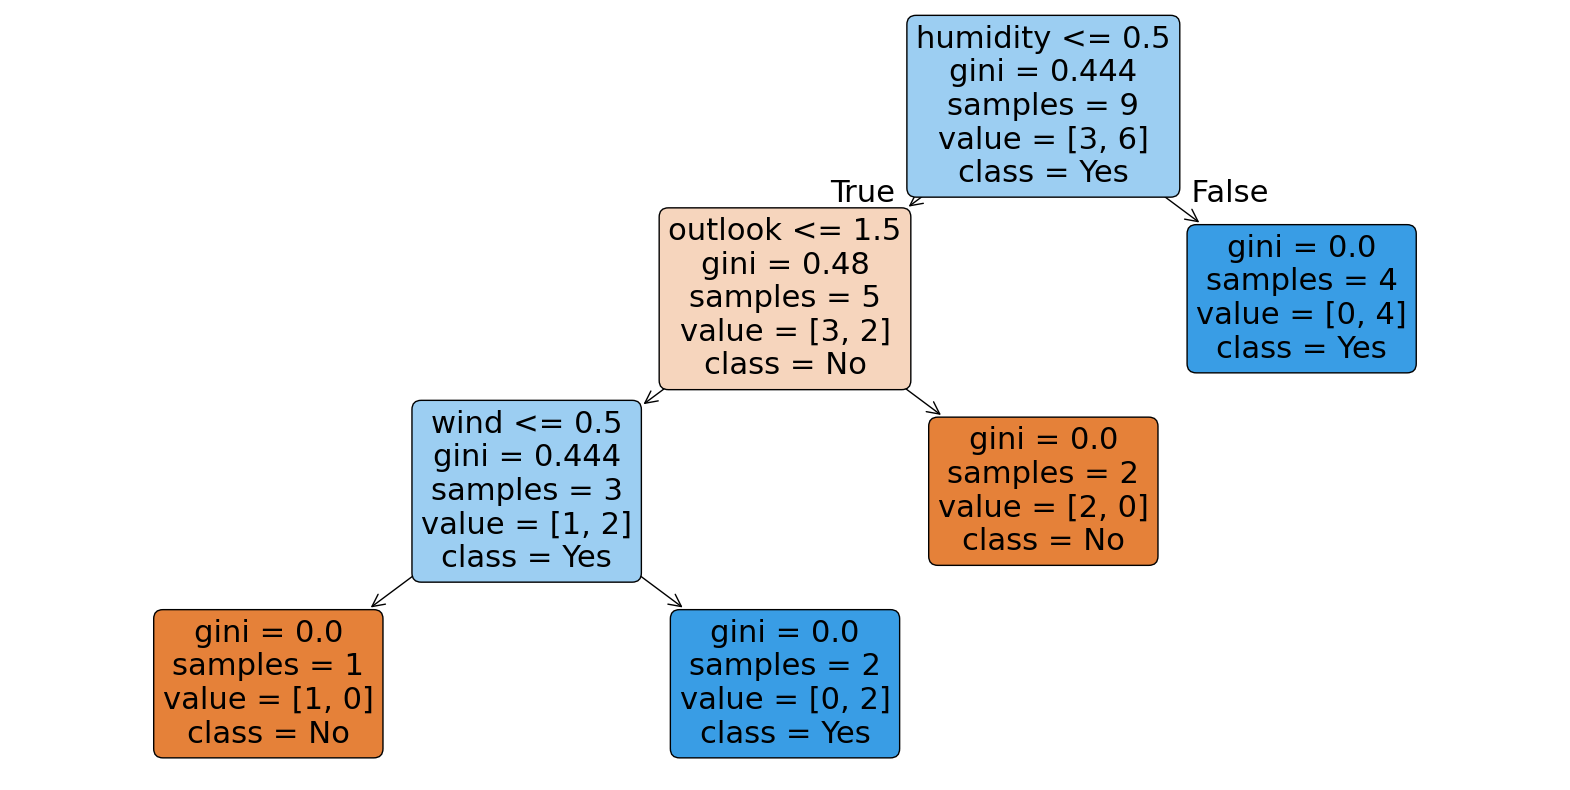

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=['outlook','temp','humidity','wind'],
          class_names=['No','Yes'],
          filled=True,
          rounded=True)
plt.show()